# 逐元素操作

In [29]:

from __future__ import print_function
import torch as t

In [36]:
a = t.Tensor(2,3)
a

tensor([[4.6808e-310,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [44]:
a = t.randn(9).view(3,3)
t.cos(a)

tensor([[0.6693, 0.7342, 0.8736],
        [0.6042, 0.7660, 0.9200],
        [0.9409, 0.7918, 0.8863]])

In [45]:
a % 3

tensor([[0.8375, 2.2537, 0.5082],
        [0.9221, 2.3018, 2.5972],
        [2.6544, 0.6570, 0.4815]])

In [46]:
t.sin(a)

tensor([[ 0.7430, -0.6789,  0.4866],
        [ 0.7968, -0.6428, -0.3920],
        [-0.3388,  0.6107,  0.4631]])

In [48]:
a = t.randn(4)
a
t.cos(a)

tensor([0.7085, 0.4998, 0.9970, 0.9996])

In [50]:
a=t.linspace(0,9,9).view(3,3)
a

tensor([[0.0000, 1.1250, 2.2500],
        [3.3750, 4.5000, 5.6250],
        [6.7500, 7.8750, 9.0000]])

In [51]:
t.cos(a)

tensor([[ 1.0000,  0.4312, -0.6282],
        [-0.9729, -0.2108,  0.7911],
        [ 0.8930, -0.0210, -0.9111]])

In [54]:
a=t.arange(0,9,1).view(3,3)
a

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [55]:
t.cos(a)

RuntimeError: "cos" not implemented for 'torch.LongTensor'

In [58]:
a.float()

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]], dtype=torch.float32)

In [59]:
t.cos(a)

RuntimeError: "cos" not implemented for 'torch.LongTensor'

In [60]:
a

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [61]:
t.cos(a.float())

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837],
        [ 0.9602,  0.7539, -0.1455]], dtype=torch.float32)

In [62]:
a**2

tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])

In [63]:
t.pow(a,2)

tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])

In [64]:
print(a)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [65]:
t.clamp(a,min=3)

tensor([[3, 3, 3],
        [3, 4, 5],
        [6, 7, 8]])

# 归并操作

In [66]:
b=t.ones(2,3)
b.sum(dim=0,keepdim=True)

tensor([[2., 2., 2.]])

In [67]:
b.sum(dim=0,keepdim=False)

tensor([2., 2., 2.])

In [68]:
b.sum(dim=1)

tensor([3., 3.])

In [70]:
a=t.arange(0,6).view(2,3)
print(a)
a.cumsum(dim=1)

tensor([[0, 1, 2],
        [3, 4, 5]])


tensor([[ 0,  1,  3],
        [ 3,  7, 12]])

# 比较

In [71]:
a=t.linspace(1,15,6).view(2,3)
a

tensor([[ 1.0000,  3.8000,  6.6000],
        [ 9.4000, 12.2000, 15.0000]])

In [72]:
b=t.linspace(15,0,6).view(2,3)
b

tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])

In [73]:
a>b

tensor([[0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [74]:
a[a>b]

tensor([ 9.4000, 12.2000, 15.0000])

In [75]:
t.max(a)

tensor(15.)

In [76]:
t.max(b,dim=1)

(tensor([15.,  6.]), tensor([0, 0]))

In [77]:
t.max(a,b)

tensor([[15.0000, 12.0000,  9.0000],
        [ 9.4000, 12.2000, 15.0000]])

In [78]:
t.clamp(a,min=10)

tensor([[10.0000, 10.0000, 10.0000],
        [10.0000, 12.2000, 15.0000]])

# 线性代数

In [79]:
b=a.t()
b.is_contiguous()

False

In [80]:
b.contiguous()

tensor([[ 1.0000,  9.4000],
        [ 3.8000, 12.2000],
        [ 6.6000, 15.0000]])

# Tensor and Numpy

In [81]:
import numpy as np
a=np.ones([2,3])
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [82]:
b=t.from_numpy(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [83]:
b=t.Tensor(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [84]:
a[0,1]=100
b

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])

In [85]:
c=b.numpy()
c

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]])

## 广播法则

    所有输入数组向 shape 最长的数组看齐，不足部分在前面加1补齐
    两个数组要么在某个维度长度一致，要么其中一个在某个维度长度为1，否则不能计算
    当输入数组某一维度长度为1时，计算沿此维度复制扩充成一样的形状

手动实现：

    unsqueeze 或者 view，实现法则1
    expand 或者 expand_as，实现法则3


In [87]:
a=t.ones(3,2)
b=t.zeros(2,3,1)
print(a)
print(b)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]])


In [88]:
a.unsqueeze(0).expand(2,3,2)+b.expand(2,3,2)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [89]:

print(t.__version__)

1.0.1.post2


### 向量化

In [91]:
def for_loop_add(x,y):
    result=[]
    for i,j in zip(x,y):
        result.append(i+j)
    return t.Tensor(result)

In [92]:
x=t.zeros(100)
y=t.ones(100)
%timeit -n 10 for_loop_add(x,y)
%timeit -n 10 x+y

552 µs ± 71.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 17.34 times longer than the fastest. This could mean that an intermediate result is being cached.
7.56 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
a = t.arange(0, 20000000)
print(a[-1], a[-2]) # 32bit的IntTensor精度有限导致溢出
b = t.LongTensor()
t.arange(0, 20000000, out=b) # 64bit的LongTensor不会溢出
b[-1],b[-2]

tensor(19999999) tensor(19999998)


(tensor(19999999), tensor(19999998))

In [94]:


a = t.randn(2,3)
a



tensor([[-1.2592,  0.3093,  0.3411],
        [ 1.8663, -1.3065,  0.9056]])

In [95]:


t.set_printoptions(precision=10)
a



tensor([[-1.2591992421,  0.3093210356,  0.3410859898],
        [ 1.8663432657, -1.3064707394,  0.9055637020]])

# 线性回归


线性回归是机器学习入门知识，应用十分广泛。线性回归利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的，其表达形式为$y = wx+b+e$，$e$为误差服从均值为0的正态分布。首先让我们来确认线性回归的损失函数： $$ loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2 $$ 然后利用随机梯度下降法更新参数$\textbf{w}$和$\textbf{b}$来最小化损失函数，最终学得$\textbf{w}$和$\textbf{b}$的数值。


In [142]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device=t.device('cuda:0')
#t.set_default_tensor_type('torch.FloatTensor')
t.get_default_dtype()

torch.float32

In [143]:
# 设置随机数种子，保证在不同电脑上运行时下面的输出一致
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

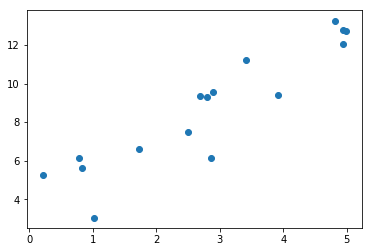

In [144]:
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

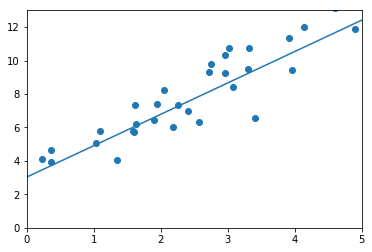

w:  1.936401605606079 b:  2.9517617225646973


In [149]:
# 随机初始化参数
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr =0.02 # 学习率

for ii in range(1000):
    x, y = get_fake_data(batch_size=4)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y) # x@W等价于x.mm(w);for python3 only
    loss = 0.5 * (y_pred - y) ** 2 # 均方误差
    loss = loss.mean()
    
    # backward：手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)#t()是转置
    db = dy_pred.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%50 ==0:
       
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0., 6,device=device).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=32) 
        plt.scatter(x2.cpu().numpy(), y2.cpu().numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
print('w: ', w.item(), 'b: ', b.item())